In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

In [78]:
df_cust=pd.read_csv("Customer_Master_Data.csv")
df_txn=pd.read_csv("Customer_Transactions.csv")

In [79]:
df_cust.head()

,CustomerID,Name,Email,Gender,Age,City,MaritalStatus,NumChildren,JoinDate
0,CUST10000,Onkar Bhargava,pkeer@yahoo.com,Male,54,Delhi,Divorced,0,2021-02-22
1,CUST10001,Divit Kohli,mkalita@sarin.com,Female,48,Kolkata,Married,0,2023-12-06
2,CUST10002,Kiara Behl,apteanay@hotmail.com,Male,75,Kolkata,Widowed,2,2023-08-23
3,CUST10003,Vaibhav Sankar,bseshadri@choudhry.info,Male,62,Pune,Divorced,2,2022-11-17
4,CUST10004,Shray D’Alia,bdhillon@toor-mall.com,Male,55,Delhi,Divorced,0,2022-12-04


In [80]:
missing_values_cust=df_cust.isnull().sum()
print("Missing values in customer dataset:\n ",missing_values_cust)

Missing values in customer dataset:
  CustomerID       0
Name             0
Email            0
Gender           0
Age              0
City             0
MaritalStatus    0
NumChildren      0
JoinDate         0
dtype: int64


In [81]:
missing_values_txn=df_txn.isnull().sum()
print("Missing values in transaction dataset:\n",missing_values_txn)

Missing values in transaction dataset:
 CustomerID           0
TransactionDate      0
TransactionAmount    0
dtype: int64


In [82]:
#checking for dataypes of each column

In [83]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1000 non-null   object
 1   Name           1000 non-null   object
 2   Email          1000 non-null   object
 3   Gender         1000 non-null   object
 4   Age            1000 non-null   int64 
 5   City           1000 non-null   object
 6   MaritalStatus  1000 non-null   object
 7   NumChildren    1000 non-null   int64 
 8   JoinDate       1000 non-null   object
dtypes: int64(2), object(7)
memory usage: 70.4+ KB


In [84]:
df_txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23050 entries, 0 to 23049
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         23050 non-null  object 
 1   TransactionDate    23050 non-null  object 
 2   TransactionAmount  23050 non-null  float64
dtypes: float64(1), object(2)
memory usage: 540.4+ KB


In [85]:
#converting all the date columns' data type to datetime type

In [108]:
df_cust['JoinDate']=pd.to_datetime(df_cust['JoinDate'],format='%Y-%m-%d')
df_txn['TransactionDate']=pd.to_datetime(df_txn['TransactionDate'],format='%m/%d/%y')

In [87]:
#To check how many records are present in the dataset


In [88]:
print("Total customer records in the Customer dataset:",df_cust.shape[0])
print("Total customer records in the Transaction dataset:",df_txn.shape[0])

Total customer records in the Customer dataset: 1000
Total customer records in the Transaction dataset: 23050


In [89]:
#Keep only valid transactions,We keep those transactions whose CustomerID exists in the customer data.

In [90]:
df_txn=df_txn[df_txn["CustomerID"].isin(df_cust["CustomerID"])].copy()
print("Transactions whose CustomerID exists in the customer data:\n",df_txn)

Transactions whose CustomerID exists in the customer data:
       CustomerID TransactionDate  TransactionAmount
0      CUST10771      2023-07-31            2383.07
1      CUST10100      2024-03-10             497.54
2      CUST10031      2025-02-17             536.78
3      CUST10987      2023-07-17             314.89
4      CUST10831      2024-12-15            2543.19
...          ...             ...                ...
23045  CUST10710      2024-03-11             931.09
23046  CUST10209      2024-06-19            2659.35
23047  CUST10570      2024-06-27             266.97
23048  CUST10075      2023-12-26            1671.73
23049  CUST10234      2024-07-07             981.32

[23050 rows x 3 columns]


In [91]:
#RFM CALCULATION

In [92]:
#find out the maximum date from the list and then add +1..we will get one particular date and can use that as reference date

#reference date=max_transaction + 1(timedelta(days=1)) - increase it by day 1

In [93]:
ref_date=df_txn["TransactionDate"].max() + timedelta(days=1)
print(ref_date)

2025-07-30 00:00:00


In [94]:
#For each customerID: FIND OUT THE

# - [RECENCY]Last transaction date = most recent purchase date
# - Frequency = no. of purchases(Rows)
# - Monetary = sum of all the transaction amounts

In [95]:
rfm=(df_txn.groupby("CustomerID").agg
     (LastTxnDate=("TransactionDate","max"),
      Frequency=("TransactionDate", "count"),
      Monetary=("TransactionAmount","sum"))
      .reset_index())
                 

In [96]:
rfm.head(20)

,CustomerID,LastTxnDate,Frequency,Monetary
0,CUST10000,2025-07-17,23,21265.49
1,CUST10001,2025-06-25,30,28654.31
2,CUST10002,2025-07-12,24,23884.03
3,CUST10003,2025-05-10,25,24206.03
4,CUST10004,2025-07-22,19,25565.30
5,CUST10005,2025-07-06,29,29459.82
6,CUST10006,2025-07-19,28,27922.36
7,CUST10007,2025-05-05,15,14957.06
8,CUST10008,2025-07-27,19,19479.25
9,CUST10009,2025-07-23,25,22832.83


In [97]:
rfm["Recency"]=(ref_date-rfm["LastTxnDate"]).dt.days

rfm.head()

,CustomerID,LastTxnDate,Frequency,Monetary,Recency
0,CUST10000,2025-07-17,23,21265.49,13
1,CUST10001,2025-06-25,30,28654.31,35
2,CUST10002,2025-07-12,24,23884.03,18
3,CUST10003,2025-05-10,25,24206.03,81
4,CUST10004,2025-07-22,19,25565.30,8


In [98]:
#Put the column in the desired sequence

rfm=rfm[["CustomerID","Recency","Frequency","Monetary"]]
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,CUST10000,13,23,21265.49
1,CUST10001,35,30,28654.31
2,CUST10002,18,24,23884.03
3,CUST10003,81,25,24206.03
4,CUST10004,8,19,25565.30


In [99]:
#Defining the scores for R F M

#RECENCY - lower the better 
# <=30 days = 5
# <=60 days = 4
# <=12 days = 3
# <=240 days = 2
# >240 days = 1

r_bins=[0,30,60,120,240,float("inf")] #inf=infinity
r_labels=[5,4,3,2,1]                  #0-30=5,30-60=4....

rfm["R_Score"]=pd.cut(rfm["Recency"],bins=r_bins,labels=r_labels,include_lowest=True).astype(int)
rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_Score
0,CUST10000,13,23,21265.49,5
1,CUST10001,35,30,28654.31,4
2,CUST10002,18,24,23884.03,5
3,CUST10003,81,25,24206.03,3
4,CUST10004,8,19,25565.30,5


In [100]:
#Frequency - higher the better

#<=7 :  1
#<=14 : 2
#<=21 : 3
#<=28: 4
#>28: 5

f_bins=[0,7,14,21,28,float("inf")] #inf=infinity
f_labels=[1,2,3,4,5]                  

rfm["F_Score"]=pd.cut(rfm["Frequency"],bins=f_bins,labels=f_labels,include_lowest=True).astype(int)
rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score
0,CUST10000,13,23,21265.49,5,4
1,CUST10001,35,30,28654.31,4,5
2,CUST10002,18,24,23884.03,5,4
3,CUST10003,81,25,24206.03,3,4
4,CUST10004,8,19,25565.30,5,3


In [101]:
#Monetary - higher the better

#<= 10000:  1
#<= 20000: 2
#<= 30000: 3
#<= 40000: 4
#>  40000: 5

m_bins=[0,10000,20000,30000,40000,float("inf")] #inf=infinity
m_labels=[1,2,3,4,5]                  

rfm["M_Score"]=pd.cut(rfm["Monetary"],bins=m_bins,labels=m_labels,include_lowest=True).astype(int)
rfm.head(15)



,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,CUST10000,13,23,21265.49,5,4,3
1,CUST10001,35,30,28654.31,4,5,3
2,CUST10002,18,24,23884.03,5,4,3
3,CUST10003,81,25,24206.03,3,4,3
4,CUST10004,8,19,25565.30,5,3,3
5,CUST10005,24,29,29459.82,5,5,3
6,CUST10006,11,28,27922.36,5,4,3
7,CUST10007,86,15,14957.06,3,3,2
8,CUST10008,3,19,19479.25,5,3,2
9,CUST10009,7,25,22832.83,5,4,3


In [102]:
rfm["RFM_Score"] = (rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str))
rfm.head(20)

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,CUST10000,13,23,21265.49,5,4,3,543
1,CUST10001,35,30,28654.31,4,5,3,453
2,CUST10002,18,24,23884.03,5,4,3,543
3,CUST10003,81,25,24206.03,3,4,3,343
4,CUST10004,8,19,25565.30,5,3,3,533
5,CUST10005,24,29,29459.82,5,5,3,553
6,CUST10006,11,28,27922.36,5,4,3,543
7,CUST10007,86,15,14957.06,3,3,2,332
8,CUST10008,3,19,19479.25,5,3,2,532
9,CUST10009,7,25,22832.83,5,4,3,543


In [103]:
def segment_row(r,f,m):
    
    if (r>=4) and (f>=4) and (m>=5):
        return "Champions"
    
    elif (r>=2) and (f>=4):
        return "Loyal"
    
    elif (r>=4) and (2<=f<=3):
        return "Potential Loyalist"
    
    elif (r<=2) and (f>=3):
        return "At Risk"
    
    elif (m>=4) and (2<=f<=3) and (r>=3):
        return "Big Spendors"
    
    elif (r==1) and (f<=2) and (m<=2):
        return "Lost"
    
    else:
        return "Others"
    
rfm["Segment"] = [segment_row(r,f,m) for r,f,m in zip(rfm["R_Score"],rfm["F_Score"],rfm["M_Score"])]

In [104]:
rfm.head(15)

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,CUST10000,13,23,21265.49,5,4,3,543,Loyal
1,CUST10001,35,30,28654.31,4,5,3,453,Loyal
2,CUST10002,18,24,23884.03,5,4,3,543,Loyal
3,CUST10003,81,25,24206.03,3,4,3,343,Loyal
4,CUST10004,8,19,25565.30,5,3,3,533,Potential Loyalist
5,CUST10005,24,29,29459.82,5,5,3,553,Loyal
6,CUST10006,11,28,27922.36,5,4,3,543,Loyal
7,CUST10007,86,15,14957.06,3,3,2,332,Others
8,CUST10008,3,19,19479.25,5,3,2,532,Potential Loyalist
9,CUST10009,7,25,22832.83,5,4,3,543,Loyal


In [105]:
#Simple business analysis

print("\n ============ Simple Business Analysis =============")

print("\n ==================")
print("\n Overall Business Summary")
print("\n ==================")

total_customers=rfm['CustomerID'].shape[0]

total_revenue=rfm["Monetary"].sum()

avg_revenue_per_Customer=rfm['Monetary'].mean().round(2)

print(f"Total Customers:{total_customers}")
print(f"Total Revenue:{total_revenue}")
print(f"Average Revenue per Customer:Rs.{avg_revenue_per_Customer}")


print("\n ==================")
print("\n Segment Wise Summary")
print("\n ==================")

#customers in each segment

segment_customers=rfm['Segment'].value_counts()

print(f" Number of customer in each segment:")
print(f"\n {segment_customers}")

#revenue for each segment
segment_revenue=rfm.groupby("Segment")["Monetary"].sum().reset_index()
print(f"\n Revenue contribution by each segment:\n")
print(f"\n {segment_revenue}")


 ============ Simple Business Analysis =============


 Overall Business Summary

Total Customers:1000
Total Revenue:23053199.66
Average Revenue per Customer:Rs.23053.2


 Segment Wise Summary

 Number of customer in each segment:

 Segment
Loyal                 621
Potential Loyalist    248
Others                 77
At Risk                47
Champions               5
Lost                    2
Name: count, dtype: int64

 Revenue contribution by each segment:


               Segment     Monetary
0             At Risk    938539.38
1           Champions    211913.12
2                Lost     29221.39
3               Loyal  15961712.80
4              Others   1416376.98
5  Potential Loyalist   4495435.99


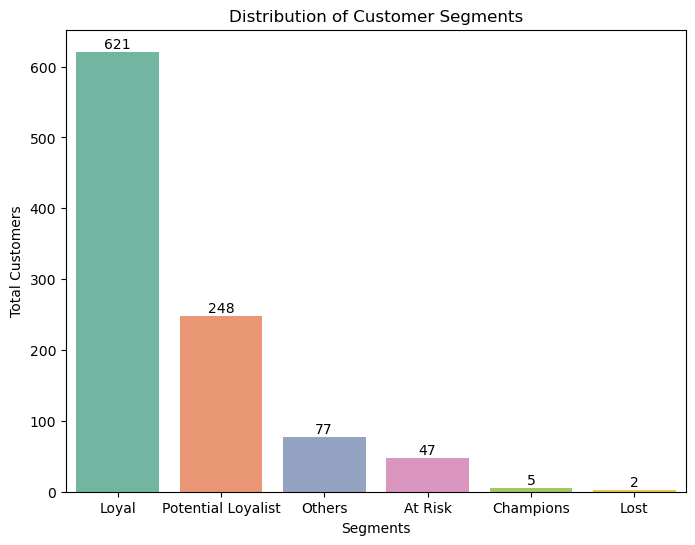

In [106]:
#Create a bar plot

plt.figure(figsize=(8,6))
sns.countplot(x='Segment',data=rfm, palette='Set2',hue='Segment')
plt.ylabel("Total Customers")
plt.xlabel("Segments")
plt.title("Distribution of Customer Segments")

#Add value labels on top of each bar

for i , count in enumerate(segment_customers):
    plt.text(i,count+5,str(count),ha="center") #ha=horizontal alignment #enumerate is used when we have derived seperately apart from the dataset.
plt.show()

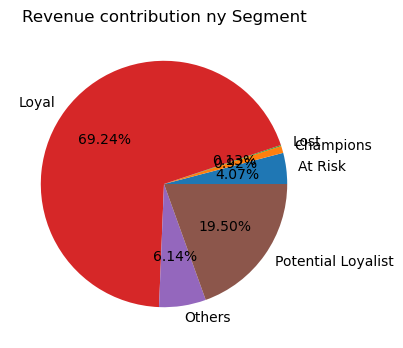

In [107]:
#pie chart to show monetary contribution for each segment

plt.figure(figsize=(6,4))
plt.pie(segment_revenue["Monetary"],labels=segment_revenue["Segment"],autopct="%1.2f%%") #autopct is for values
plt.title("Revenue contribution ny Segment")
plt.show()